In [1]:
import sys
import numpy as np
import xarray as xr
from numpy import sin, cos, deg2rad, rad2deg,  pi
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import geopandas as gpd
import atlite
import pandas as pd
import xarray as xr
import numpy as np
import geopandas as gpd

import requests
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pvlib

import warnings
import logging

from datetime import datetime
from datetime import timedelta
warnings.filterwarnings("ignore") 
logging.getLogger("py.warnings").setLevel(logging.ERROR)

import sys
import numpy as np
import xarray as xr
from numpy import sin, cos, deg2rad, rad2deg,  pi
import geopandas as gpd
import atlite
import pandas as pd
import xarray as xr
import numpy as np
import geopandas as gpd
import functools
import logging
import time

import atlite
import geopandas as gpd
import numpy as np
import xarray as xr
#from _helpers import configure_logging
from dask.distributed import Client, LocalCluster
from pypsa.geo import haversine
from shapely.geometry import LineString



import requests
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pvlib


In [2]:

country_codes={'AT':'Austria',
          'BE':'Belgium',
          'BG':'Bulgaria',
          'CH':'Switzerland',
          'CZ':'Czechia',
          'DE':'Germany',
          'DK':'Denmark',
          'EE':'Estonia',
          'ES':'Spain',
          'FI':'Finland',
          'FR':'France',
          'GB':'United Kingdom',
          'GR':'Greece',
          'HR':'Croatia',
          'HU':'Hungary',
          'IT':'Italy',
          'LT':'Lithuania',
          'LU':'Luxembourg',
          'LV':'Latvia',
          'NO':'Norway',
          'PL':'Poland',
          'PT':'Portugal',
          'RO':'Romania',
          'SE':'Sweden',
          'SI':'Slovenia',
          'SK':'Slovakia',
          'IE':'Ireland',
          'NL':'Netherlands',
          'ME':'Montenegro',
          'AL':'Albania',
          'BA':'Bosnia and Herzegovina',
          'MK':'North Macedonia',
          'RS':'Serbia',}


In [3]:
country_to_abbrev = {
    "Andorra": "AD",
    "United Arab Emirates": "AE",
    "Afghanistan": "AF",
    "Antigua and Barbuda": "AG",
    "Anguilla": "AI",
    "Albania": "AL",
    "Armenia": "AM",
    "Angola": "AO",
    "Antarctica": "AQ",
    "Argentina": "AR",
    "American Samoa": "AS",
    "Austria": "AT",
    "Australia": "AU",
    "Aruba": "AW",
    "Åland Islands": "AX",
    "Azerbaijan": "AZ",
    "Bosnia and Herzegovina": "BA",
    "Barbados": "BB",
    "Bangladesh": "BD",
    "Belgium": "BE",
    "Burkina Faso": "BF",
    "Bulgaria": "BG",
    "Bahrain": "BH",
    "Burundi": "BI",
    "Benin": "BJ",
    "Saint Barthélemy": "BL",
    "Bermuda": "BM",
    "Brunei Darussalam": "BN",
    "Bolivia (Plurinational State of)": "BO",
    "Bonaire, Sint Eustatius and Saba": "BQ",
    "Brazil": "BR",
    "Bahamas": "BS",
    "Bhutan": "BT",
    "Bouvet Island": "BV",
    "Botswana": "BW",
    "Belarus": "BY",
    "Belize": "BZ",
    "Canada": "CA",
    "Cocos (Keeling) Islands": "CC",
    "Congo, Democratic Republic of the": "CD",
    "Central African Republic": "CF",
    "Congo": "CG",
    "Switzerland": "CH",
    "Côte d'Ivoire": "CI",
    "Cook Islands": "CK",
    "Chile": "CL",
    "Cameroon": "CM",
    "China": "CN",
    "Colombia": "CO",
    "Costa Rica": "CR",
    "Cuba": "CU",
    "Cabo Verde": "CV",
    "Curaçao": "CW",
    "Christmas Island": "CX",
    "Cyprus": "CY",
    "Czechia": "CZ",
    "Germany": "DE",
    "Djibouti": "DJ",
    "Denmark": "DK",
    "Dominica": "DM",
    "Dominican Republic": "DO",
    "Algeria": "DZ",
    "Ecuador": "EC",
    "Estonia": "EE",
    "Egypt": "EG",
    "Western Sahara": "EH",
    "Eritrea": "ER",
    "Spain": "ES",
    "Ethiopia": "ET",
    "Finland": "FI",
    "Fiji": "FJ",
    "Falkland Islands (Malvinas)": "FK",
    "Micronesia (Federated States of)": "FM",
    "Faroe Islands": "FO",
    "France": "FR",
    "Gabon": "GA",
    "United Kingdom": "GB",
    "Grenada": "GD",
    "Georgia": "GE",
    "French Guiana": "GF",
    "Guernsey": "GG",
    "Ghana": "GH",
    "Gibraltar": "GI",
    "Greenland": "GL",
    "Gambia": "GM",
    "Guinea": "GN",
    "Guadeloupe": "GP",
    "Equatorial Guinea": "GQ",
    "Greece": "GR",
    "South Georgia and the South Sandwich Islands": "GS",
    "Guatemala": "GT",
    "Guam": "GU",
    "Guinea-Bissau": "GW",
    "Guyana": "GY",
    "Hong Kong": "HK",
    "Heard Island and McDonald Islands": "HM",
    "Honduras": "HN",
    "Croatia": "HR",
    "Haiti": "HT",
    "Hungary": "HU",
    "Indonesia": "ID",
    "Ireland": "IE",
    "Israel": "IL",
    "Isle of Man": "IM",
    "India": "IN",
    "British Indian Ocean Territory": "IO",
    "Iraq": "IQ",
    "Iran (Islamic Republic of)": "IR",
    "Iceland": "IS",
    "Italy": "IT",
    "Jersey": "JE",
    "Jamaica": "JM",
    "Jordan": "JO",
    "Japan": "JP",
    "Kenya": "KE",
    "Kyrgyzstan": "KG",
    "Cambodia": "KH",
    "Kiribati": "KI",
    "Comoros": "KM",
    "Saint Kitts and Nevis": "KN",
    "Korea (Democratic People's Republic of)": "KP",
    "Korea, Republic of": "KR",
    "Kuwait": "KW",
    "Cayman Islands": "KY",
    "Kazakhstan": "KZ",
    "Lao People's Democratic Republic": "LA",
    "Lebanon": "LB",
    "Saint Lucia": "LC",
    "Liechtenstein": "LI",
    "Sri Lanka": "LK",
    "Liberia": "LR",
    "Lesotho": "LS",
    "Lithuania": "LT",
    "Luxembourg": "LU",
    "Latvia": "LV",
    "Libya": "LY",
    "Morocco": "MA",
    "Monaco": "MC",
    "Moldova, Republic of": "MD",
    "Montenegro": "ME",
    "Saint Martin (French part)": "MF",
    "Madagascar": "MG",
    "Marshall Islands": "MH",
    "North Macedonia": "MK",
    "Mali": "ML",
    "Myanmar": "MM",
    "Mongolia": "MN",
    "Macao": "MO",
    "Northern Mariana Islands": "MP",
    "Martinique": "MQ",
    "Mauritania": "MR",
    "Montserrat": "MS",
    "Malta": "MT",
    "Mauritius": "MU",
    "Maldives": "MV",
    "Malawi": "MW",
    "Mexico": "MX",
    "Malaysia": "MY",
    "Mozambique": "MZ",
    "Namibia": "NA",
    "New Caledonia": "NC",
    "Niger": "NE",
    "Norfolk Island": "NF",
    "Nigeria": "NG",
    "Nicaragua": "NI",
    "Netherlands": "NL",
    "Norway": "NO",
    "Nepal": "NP",
    "Nauru": "NR",
    "Niue": "NU",
    "New Zealand": "NZ",
    "Oman": "OM",
    "Panama": "PA",
    "Peru": "PE",
    "French Polynesia": "PF",
    "Papua New Guinea": "PG",
    "Philippines": "PH",
    "Pakistan": "PK",
    "Poland": "PL",
    "Saint Pierre and Miquelon": "PM",
    "Pitcairn": "PN",
    "Puerto Rico": "PR",
    "Palestine, State of": "PS",
    "Portugal": "PT",
    "Palau": "PW",
    "Paraguay": "PY",
    "Qatar": "QA",
    "Réunion": "RE",
    "Romania": "RO",
    "Serbia": "RS",
    "Russian Federation": "RU",
    "Rwanda": "RW",
    "Saudi Arabia": "SA",
    "Solomon Islands": "SB",
    "Seychelles": "SC",
    "Sudan": "SD",
    "Sweden": "SE",
    "Singapore": "SG",
    "Saint Helena, Ascension and Tristan da Cunha": "SH",
    "Slovenia": "SI",
    "Svalbard and Jan Mayen": "SJ",
    "Slovakia": "SK",
    "Sierra Leone": "SL",
    "San Marino": "SM",
    "Senegal": "SN",
    "Somalia": "SO",
    "Suriname": "SR",
    "South Sudan": "SS",
    "Sao Tome and Principe": "ST",
    "El Salvador": "SV",
    "Sint Maarten (Dutch part)": "SX",
    "Syrian Arab Republic": "SY",
    "Eswatini": "SZ",
    "Turks and Caicos Islands": "TC",
    "Chad": "TD",
    "French Southern Territories": "TF",
    "Togo": "TG",
    "Thailand": "TH",
    "Tajikistan": "TJ",
    "Tokelau": "TK",
    "Timor-Leste": "TL",
    "Turkmenistan": "TM",
    "Tunisia": "TN",
    "Tonga": "TO",
    "Turkey": "TR",
    "Trinidad and Tobago": "TT",
    "Tuvalu": "TV",
    "Taiwan, Province of China": "TW",
    "Tanzania, United Republic of": "TZ",
    "Ukraine": "UA",
    "Uganda": "UG",
    "United States Minor Outlying Islands": "UM",
    "United States of America": "US",
    "Uruguay": "UY",
    "Uzbekistan": "UZ",
    "Holy See": "VA",
    "Saint Vincent and the Grenadines": "VC",
    "Venezuela (Bolivarian Republic of)": "VE",
    "Virgin Islands (British)": "VG",
    "Virgin Islands (U.S.)": "VI",
    "Viet Nam": "VN",
    "Vanuatu": "VU",
    "Wallis and Futuna": "WF",
    "Samoa": "WS",
    "Yemen": "YE",
    "Mayotte": "YT",
    "South Africa": "ZA",
    "Zambia": "ZM",
    "Zimbabwe": "ZW",
}
country_codes= {v: k for k, v in country_to_abbrev.items()}


# PV production with atlite

In [ ]:
##The required cutout file can be downloaded from: https://zenodo.org/records/12791128
## The produced file pnales.nc is already included in the Zenodo repo. mentioned in README

if __name__ == "__main__": 

    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

    snapshots_=   {'start': "2013-01-01" ,
      'end': "2014-01-01" ,
      'closed': 'left' }

    time = pd.date_range(freq='h', **snapshots_)

    cutout_config = 'cutouts/europe-2013-era5.nc'     
    cutout = atlite.Cutout(cutout_config).sel(time=time)
    area = cutout.grid.to_crs(3035).area / 1e6
    area = xr.DataArray(
        area.values.reshape(cutout.shape), [cutout.coords["y"], cutout.coords["x"]]
    )

    nprocesses = 8
    noprogress = True
    correction_factor = 1
    capacity_per_sqkm = 1.7
    p_nom_max_meth = 'simple'
    cluster = LocalCluster(n_workers=nprocesses, threads_per_worker=1)
    client = Client(cluster, asynchronous=True)

    regions = gpd.read_file('resources/regions_onshore.geojson' )
    regions = regions.set_index("name").rename_axis("bus")
    buses = regions.index
    res = 100
    excluder = atlite.ExclusionContainer(crs=3035, res=res)
    kwargs = dict(nprocesses=nprocesses, disable_progressbar=noprogress)

    availability = cutout.availabilitymatrix(regions, excluder, **kwargs)

    potential = capacity_per_sqkm * availability.sum("bus") * area
    func = getattr(cutout, 'pv')
    resource={
      'panel': 'CSi' ,
      'orientation': {
        'slope': 35. ,
        'azimuth': 180. }}
    resource["dask_kwargs"] = {"scheduler": client}
    profile = func(
        matrix=availability.stack(spatial=["y", "x"]),
        index=buses,
        per_unit=True,
        return_capacity=False,
        **resource,
    )

    data=xr.DataArray(None, coords=dict(slope= [i for i in range(0,91,5)],azimuth=[i for i in range(90,271,10)],
                                    time=profile.time.values, 
                                    bus=[i for i in regions['country'].unique()]), 
                                    dims=("slope","azimuth","time", "bus")) 

    for i, slope_ in enumerate(range(0,5,5)):
      for j, azimuth_ in enumerate(range(90,100,10)):
        resource={
           'panel': 'CSi' ,
           'orientation': {
           'slope': slope_ ,
           'azimuth': azimuth_ }}
        profile = func(
         matrix=availability.stack(spatial=["y", "x"]),
         index=buses,
         per_unit=True,
         return_capacity=False,
         **resource,
        )
        
        df=profile.to_pandas()
        for column in df.columns:
           df=df.rename(columns={column: regions.loc[column]['country']}, inplace=False )
        df=df.groupby(df.columns, axis=1).sum() 
        data[i][j]=df.values

        
    data.to_netcdf('panels.nc')           
        
        
        

## ATTENTION: all files are ERA5

In [4]:
with xr.open_dataset("data/panels.nc") as pv_config:
    print(pv_config.keys())


KeysView(<xarray.Dataset>
Dimensions:                        (slope: 19, azimuth: 19, time: 8760, bus: 33)
Coordinates:
  * slope                          (slope) int64 0 5 10 15 20 ... 70 75 80 85 90
  * azimuth                        (azimuth) int64 90 100 110 ... 250 260 270
  * time                           (time) datetime64[ns] 2013-01-01 ... 2013-...
  * bus                            (bus) object 'AL' 'AT' 'BA' ... 'SI' 'SK'
Data variables:
    __xarray_dataarray_variable__  (slope, azimuth, time, bus) float64 ...)


## preruns for figures

In [5]:
pv_config_pd= pv_config.to_dataframe()

pv_config_pd

__xarray_dataarray_variable__
slope azimuth time                bus                               
0     90      2013-01-01 00:00:00 AL                             0.0
                                  AT                             0.0
                                  BA                             0.0
                                  BE                             0.0
                                  BG                             0.0
...                                                              ...
90    270     2013-12-31 23:00:00 RO                             0.0
                                  RS                             0.0
                                  SE                             0.0
                                  SI                             0.0
                                  SK                             0.0

[104357880 rows x 1 columns]

In [6]:
pv_config_EU= pv_config_pd.groupby(level=[0, 1]).sum()


In [7]:
pv_config_fig=pd.DataFrame(columns=('slope', 'azimuth', 'EU_pmaxpu'))

pv_config_fig['slope']=pv_config_EU.index.get_level_values(0).values
pv_config_fig['azimuth']=pv_config_EU.index.get_level_values(1).values
pv_config_fig['EU_pmaxpu']=pv_config_EU.__xarray_dataarray_variable__.values



In [8]:
pv_config_EU= pv_config_pd.groupby(level=[0, 1]).sum()
pv_config_EU=pv_config_EU.unstack()
pv_config_EU.columns = pv_config_EU.columns.get_level_values(1)


(0.0, 1.0, 0.0, 1.0)

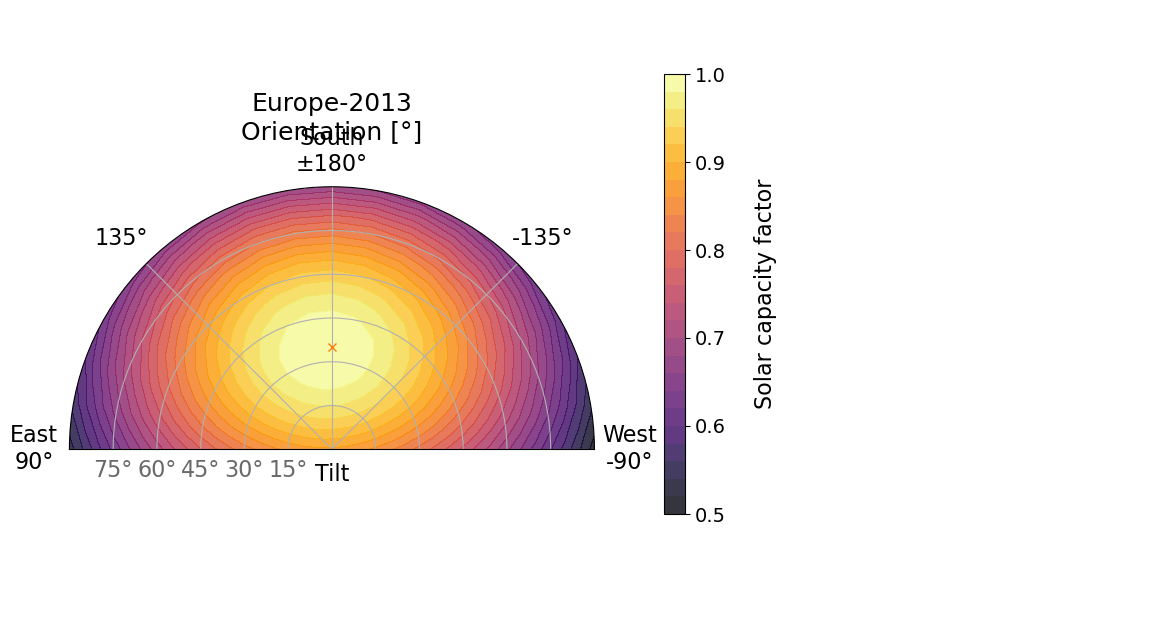

In [9]:
# EU solar capacity factor for 1992/2000/2013

tilt_range = np.arange(start=0, stop=91, step=5)
orientation_range = np.arange(start=90, stop=271, step=10)

r_angles, theta_angles = np.meshgrid(tilt_range, np.radians(orientation_range))

poa_tmy = np.zeros(shape=r_angles.shape)
for i, orientation in enumerate(orientation_range):
    for j, tilt in enumerate(tilt_range):
        poa_tmy[i, j] = pv_config_fig[(pv_config_fig['slope'] == tilt) & (pv_config_fig['azimuth'] == orientation)].EU_pmaxpu.sum()

#%%
#print(f"Annual irradiation={poa_tmy.max()/1000:.0f} kWh/m2")

fig = plt.figure(figsize=(14, 8))
spec = fig.add_gridspec(nrows=1, ncols=1, right=0.5)

ax_polar = fig.add_subplot(spec[0,0], polar=True)
im = ax_polar.contourf(theta_angles, r_angles, poa_tmy / poa_tmy.max() , levels=30, cmap='inferno', alpha=0.8)
ax_polar.set_theta_zero_location('S')

ax_polar.set_theta_zero_location('S')
ax_polar.set_theta_direction(-1)
ax_polar.set_thetamin(90)
ax_polar.set_thetamax(270)


# radius
rtick_locs = np.arange(start=15, stop=90, step=15)
rtick_labels = [f'{r}°' for r in rtick_locs]
ax_polar.set_rgrids(rtick_locs, labels=rtick_labels, fontsize=12, color='dimgrey',  angle=0.)

# orientation
thetatick_locs = np.arange(start=90, stop=271, step=45)
thetatick_labels = [] #['East','South east','South','South west','West']
for theta in thetatick_locs:
    if theta == 180:
        thetatick_labels.append('South\n±180°')
    elif theta == 90:
        thetatick_labels.append('East\n90°')
    elif theta == 270:
        thetatick_labels.append('West\n-90°')    
    elif theta > 180:
        thetatick_labels.append(f'{theta - 360}°')
    else:
        thetatick_labels.append(f'{theta}°')


ax_polar.set_thetagrids(thetatick_locs, labels=thetatick_labels, fontsize=16)
ax_polar.xaxis.set_tick_params(pad=15)
#if k==0: ax_polar.set_xlabel('EU solar load cover-2013'+'\nOrientation [°]\n', fontsize=12, )
#if k==1: ax_polar.set_xlabel('EU solar peak load cover-2013'+'\nOrientation [°]\n', fontsize=12, )
ax_polar.xaxis.set_label_coords(0, 0.93)
ax_polar.set_xlabel('Europe-2013\nOrientation [°]', fontsize=18, )  ##2000, 1992


# tilt
ax_polar.set_ylabel('Tilt', rotation=0, fontsize=16)
ax_polar.yaxis.set_label_coords(0.5, 0.18)
ax_polar.set_rmax(90)
ax_polar.set_rlabel_position(200)
ax_polar.yaxis.set_tick_params(labelsize=16, labelcolor='dimgrey')


# [left, bottom, width, height]
cbar_ax = fig.add_axes([0.55, 0.25, 0.015, 0.55])
spec_cbar = fig.add_gridspec(nrows=1, ncols=1, left=0.55, right=0.57)
cb=fig.colorbar(im, cax=cbar_ax, ticks=np.arange(start=0, stop=1.1, step=0.1), )
cb.set_label('Solar capacity factor', labelpad=20, fontsize=16)
cb.ax.tick_params(labelsize=14)
#cbar_ax.yaxis.set_major_formatter(PercentFormatter())

# add cubes

idx_max = np.unravel_index(np.argmax(poa_tmy, axis=None), poa_tmy.shape)
ax_polar.plot(np.radians(orientation_range[idx_max[0]]), tilt_range[idx_max[1]], marker='x', color='C1')

spec_cube = fig.add_gridspec(nrows=1, ncols=1, left=0.7)
ax_cube = fig.add_subplot(spec_cube[0,0])
#ax_cube.imshow(plt.imread('data/Figure2.16 - annual_irradiation - cube_main.png'))
ax_cube.axis('off')

#plt.savefig('Figure2.16 - annual_irradiation.jpg', dpi=300, bbox_inches='tight')

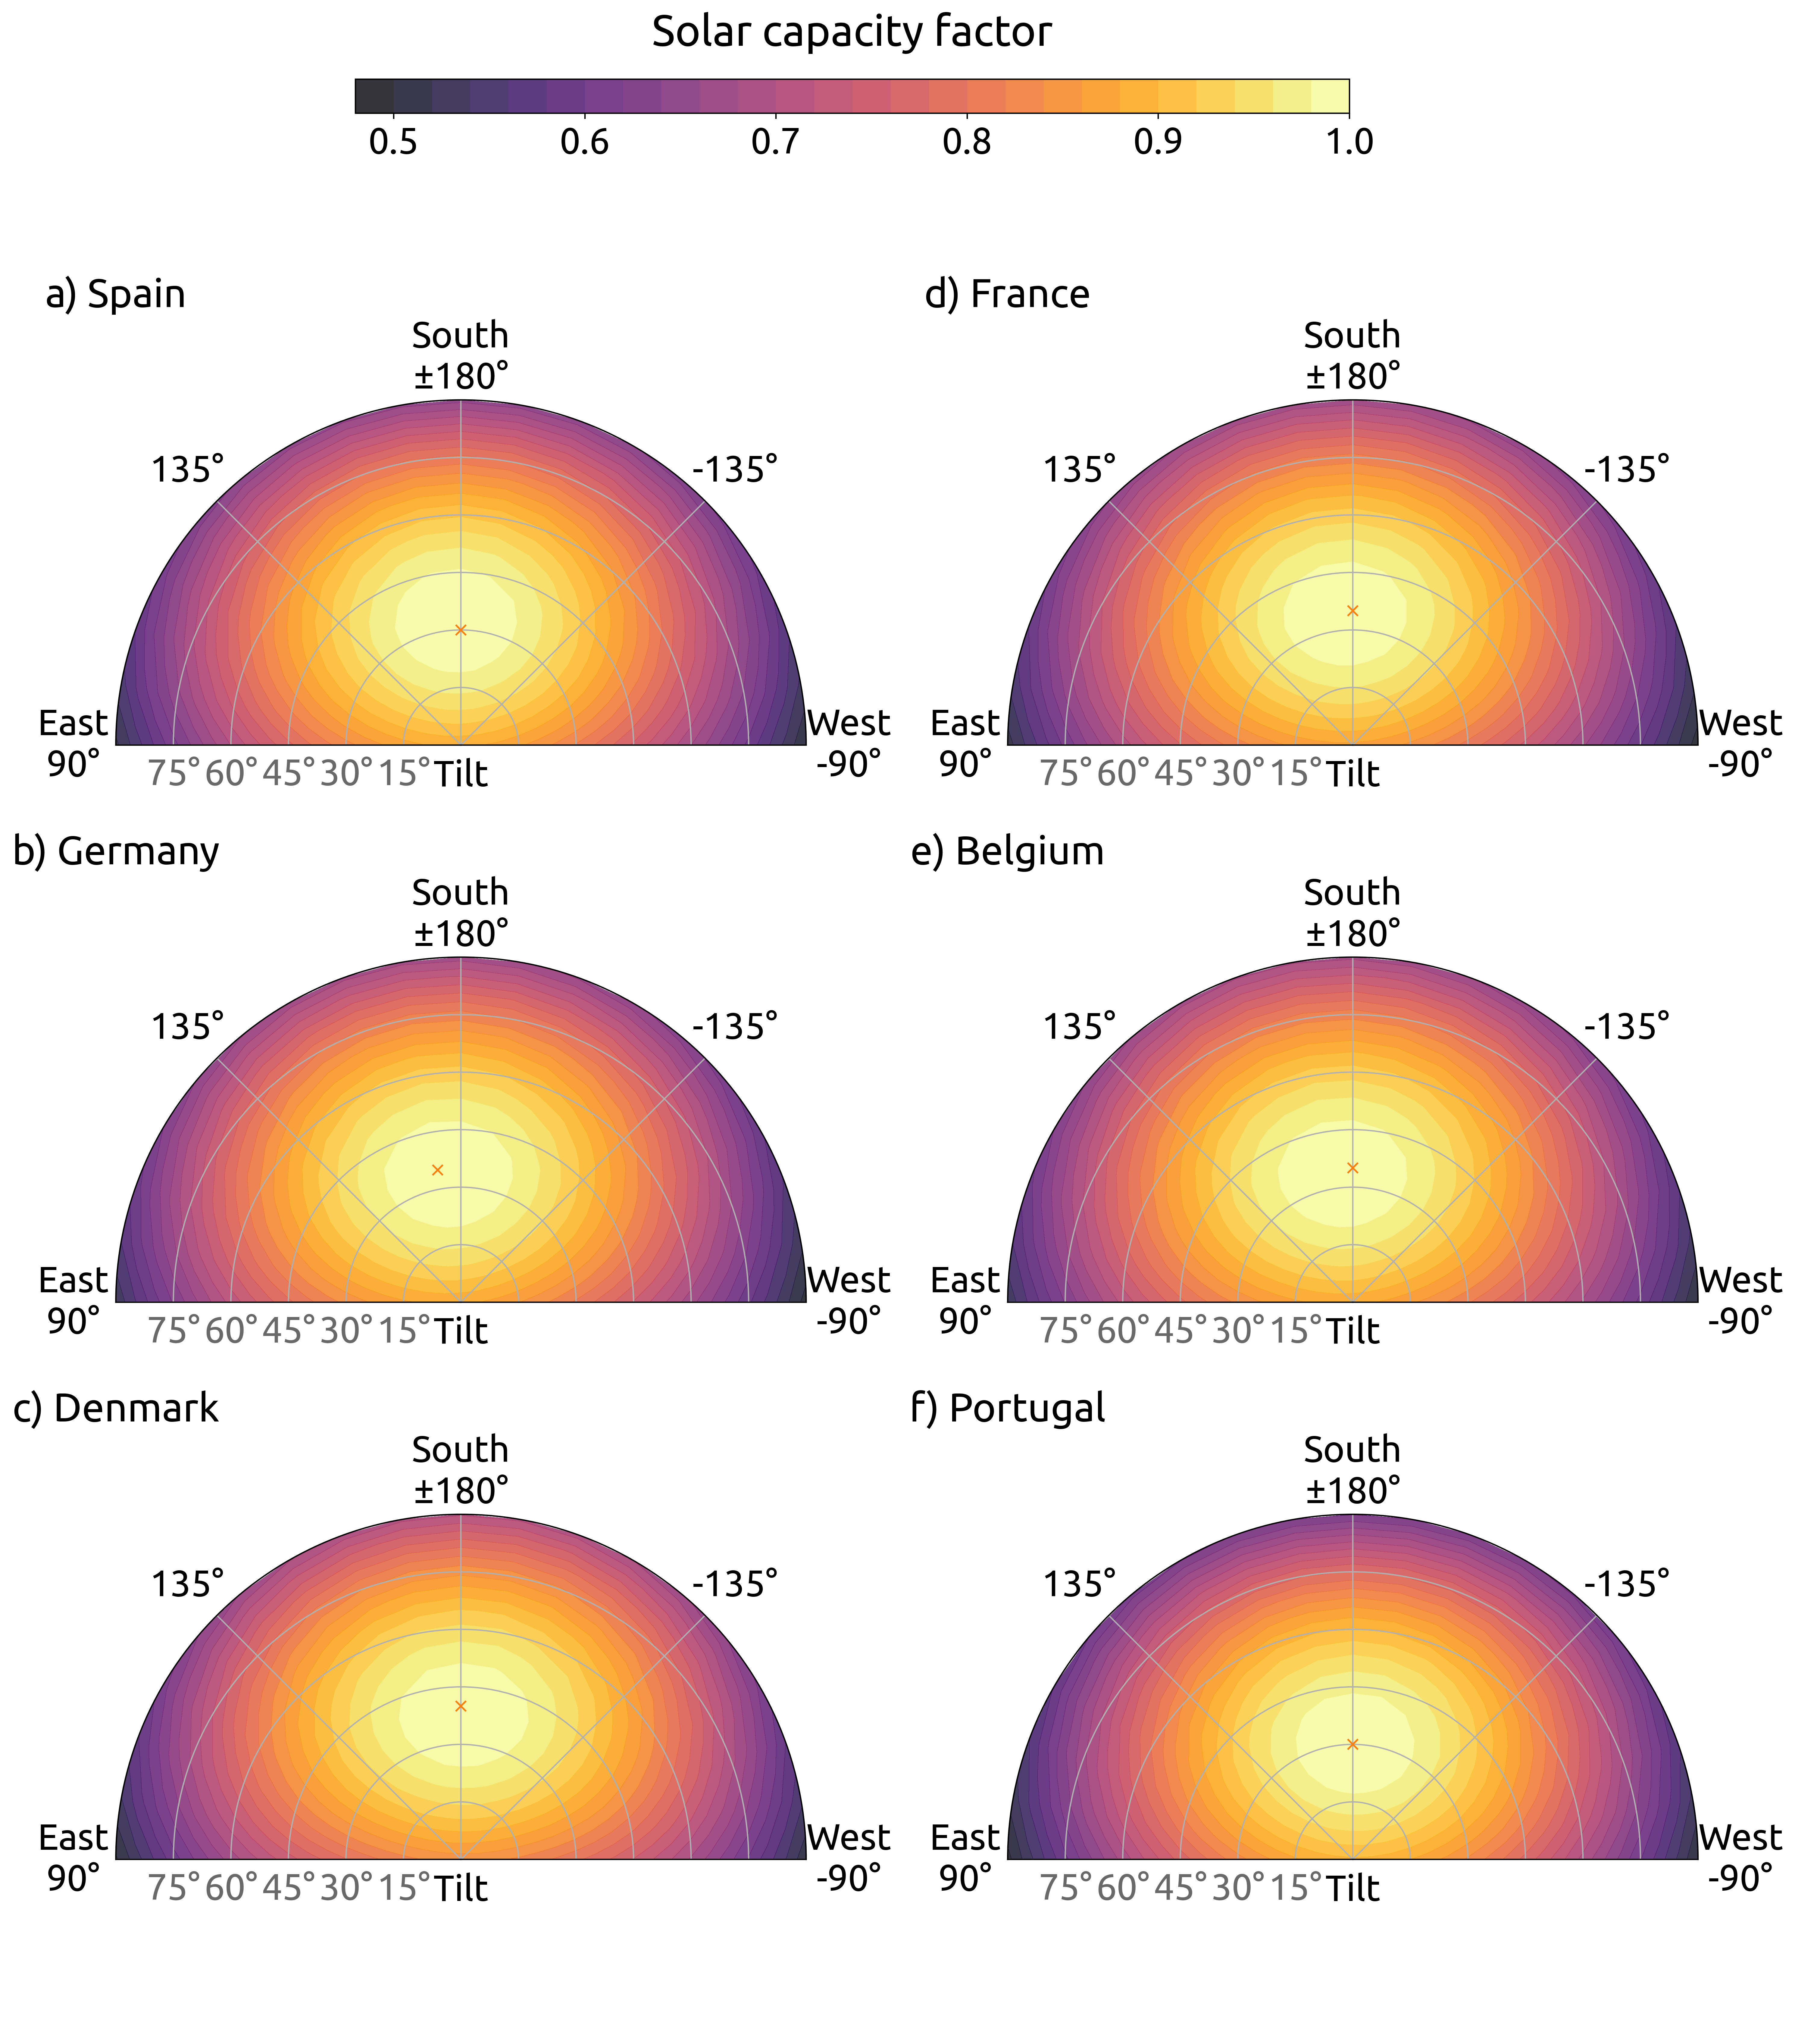

In [10]:
## Country-wise solar capacity for 1992/2000/2013 figure
plt.rcParams['figure.dpi'] = 400
plt.rc('font',family='Ubuntu')


fig, axs = plt.subplots(3,2, figsize=(15,18.75),subplot_kw={'projection': 'polar'}) #, sharey=True)
plt.subplots_adjust(wspace=0.08, hspace=-0.8)
j=1
label_letter=['a) ','d) ','b) ','e) ','c) ','f) ']

for k, country in enumerate(['ES', 'FR', 'DE', 'BE' , 'DK', 'PT']):
  i= int(k/2)
  j= int(k%2)
  pv_config_fig=pd.DataFrame(columns=('slope', 'azimuth', 'EU_pmaxpu'))

  pv_country= pv_config.sel(bus=country).to_dataframe().groupby(level=[0, 1]).sum()

  pv_config_fig['slope']=pv_country.index.get_level_values(0).values
  pv_config_fig['azimuth']=pv_country.index.get_level_values(1).values
  pv_config_fig['EU_pmaxpu']=pv_country.__xarray_dataarray_variable__.values

  tilt_range = np.arange(start=0, stop=91, step=5)
  orientation_range = np.arange(start=90, stop=271, step=10)
  
  r_angles, theta_angles = np.meshgrid(tilt_range, np.radians(orientation_range))

  poa_tmy = np.zeros(shape=r_angles.shape)
  for o, orientation in enumerate(orientation_range):
    for t, tilt in enumerate(tilt_range):
        poa_tmy[o, t] = pv_config_fig[(pv_config_fig['slope'] == tilt) & (pv_config_fig['azimuth'] == orientation)].EU_pmaxpu.sum()




  ax_polar = axs[i,j]
  im = ax_polar.contourf(theta_angles, r_angles, poa_tmy / poa_tmy.max() , levels=30, cmap='inferno', alpha=0.8)
  ax_polar.set_theta_zero_location('S')

  ax_polar.set_theta_zero_location('S')
  ax_polar.set_theta_direction(-1)
  ax_polar.set_thetamin(90)
  ax_polar.set_thetamax(270)


  # radius
  rtick_locs = np.arange(start=15, stop=90, step=15)
  rtick_labels = [f'{r}°' for r in rtick_locs]
  ax_polar.set_rgrids(rtick_locs, labels=rtick_labels, fontsize=20, color='dimgrey',  angle=0.)
  #ax_polar.set_yticklabels([])
  #for loc, lbl in zip(rtick_locs, rtick_labels):
  #  ax.text(0., loc, lbl,
  #          ha='center',
  #          va='top', 
  #          fontsize=16)
    
  # orientation
  thetatick_locs = np.arange(start=90, stop=271, step=45)
  thetatick_labels = [] #['East','South east','South','South west','West']
  for theta in thetatick_locs:
    if theta == 180:
        thetatick_labels.append('South\n±180°')
    elif theta == 90:
        thetatick_labels.append('East\n90°')
    elif theta == 270:
        thetatick_labels.append('West\n-90°')    
    elif theta > 180:
        thetatick_labels.append(f'{theta - 360}°')
    else:
        thetatick_labels.append(f'{theta}°')

  ax_polar.set_thetagrids(thetatick_locs, labels=thetatick_labels, fontsize=22)
  ax_polar.xaxis.set_tick_params(pad=15)
  ax_polar.set_xlabel(label_letter[k]+country_codes[country], fontsize=24, )  #+'\nOrientation [°]'
  ax_polar.xaxis.set_label_coords(0, 0.93)

  # tilt
  ax_polar.set_ylabel('Tilt', rotation=0, fontsize=22)
  ax_polar.yaxis.set_label_coords(0.5, 0.18)
  ax_polar.set_rmax(90)
  ax_polar.set_rlabel_position(200)
  ax_polar.yaxis.set_tick_params(labelsize=22, labelcolor='dimgrey')

  # add cubes

  idx_max = np.unravel_index(np.argmax(poa_tmy, axis=None), poa_tmy.shape)
  ax_polar.plot(np.radians(orientation_range[idx_max[0]]), tilt_range[idx_max[1]], marker='x', color='C1')

  #spec_cube = fig.add_gridspec(nrows=1, ncols=1, left=0.7)
  #ax_cube = fig.add_subplot(spec_cube[0,0])
  #ax_cube.imshow(plt.imread('data/Figure2.16 - annual_irradiation - cube_main.png'))
  #ax_cube.axis('off')
  #plt.savefig('Figure2.16 - annual_irradiation.jpg', dpi=300, bbox_inches='tight')


# [left, bottom, width, height]
cbar_ax = fig.add_axes([0.2, 0.95, 0.55, 0.015])
spec_cbar = fig.add_gridspec(nrows=1, ncols=1, left=0.55, right=0.57)
cb=fig.colorbar(im, cax=cbar_ax, ticks=np.arange(start=0, stop=1.1, step=0.1), shrink=0.01, orientation="horizontal",)
#cb.set_label('Solar capacity factor', labelpad=20, fontsize=16)
cb.ax.set_title('Solar capacity factor', fontsize=26, pad=20)
cb.ax.tick_params(labelsize=22)
#cbar_ax.yaxis.set_major_formatter(PercentFormatter())



fig.tight_layout()
plt.show()

## Load coverage

In [ ]:
import pypsa
n=pypsa.Network('resources/networks/elec_s370_37m_ec_lv1.1_.nc')

In [108]:
pv_config_pd= pv_config.to_dataframe()
pv_config_EU_load= pv_config_pd.groupby(level=[0, 1,2]).sum()

In [109]:
pv_config_fig_load=pd.DataFrame(columns=('slope', 'azimuth', 'EU_load_cover','EU_peak_cover'))
pv_config_EU= pv_config_pd.groupby(level=[0, 1]).sum()

pv_config_fig_load['slope']=pv_config_EU.index.get_level_values(0).values
pv_config_fig_load['azimuth']=pv_config_EU.index.get_level_values(1).values
pv_config_fig_load.set_index(['slope', 'azimuth'], inplace=True)


In [110]:
from datetime import timedelta

df_cover=pd.DataFrame({})
df_cover['load']=(n.loads_t.p_set.sum(axis=1))#(n.loads_t.p_set.loc[:, [i for i in n.loads.index if n.loads.carrier[i]=='electricity']].sum(axis=1))
df_cover.set_index(n.snapshots)
df_cover['hour']=df_cover.index.hour

In [111]:
peak_hours=[]
for day_begin in df_cover.index:
        day_end=day_begin+timedelta(hours=23)
        list_peak=(df_cover['load'][day_begin:day_end].sort_values(ascending=False).index[0:6])  #6 peak hours
        for i in list_peak:
            peak_hours.append(i)


## normalisation assuming all configurations have the capacity of solar_gen(35, 180) = load_avg

In [114]:
from datetime import timedelta

df_cover=pd.DataFrame({})
df_cover['load']=(n.loads_t.p_set.sum(axis=1))
df_cover.set_index(n.snapshots)
df_cover['hour']=df_cover.index.hour

CAP_base = (df_cover['load'].mean()/
                           pv_config_EU_load.loc[35,180].__xarray_dataarray_variable__.mean())


for slope in range(0,91,5):
    print(slope)
    for azimuth in range(90,271,10):  ##
       df_tmp= pv_config_EU_load.loc[slope,azimuth] 
       #df_tmp.drop(df_tmp['2000-02-29 00:00:00':'2000-02-29 23:00:00'].index, inplace=True) ## activate for leap year
      
       df_cover['solar']=df_tmp.__xarray_dataarray_variable__.values  ##sum of CF for all Europe
       df_cover['solar']*= CAP_base


       pv_config_fig_load.loc[slope, azimuth]['EU_load_cover']=(1-
                            ((df_cover['load']-df_cover['solar']).clip(0).sum()/df_cover['load'].sum()))
       pv_config_fig_load.loc[slope, azimuth]['EU_peak_cover']=(1-
           ((df_cover['load'][peak_hours]-df_cover['solar'][peak_hours]).clip(0).sum()/df_cover['load'][peak_hours].sum()))

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90


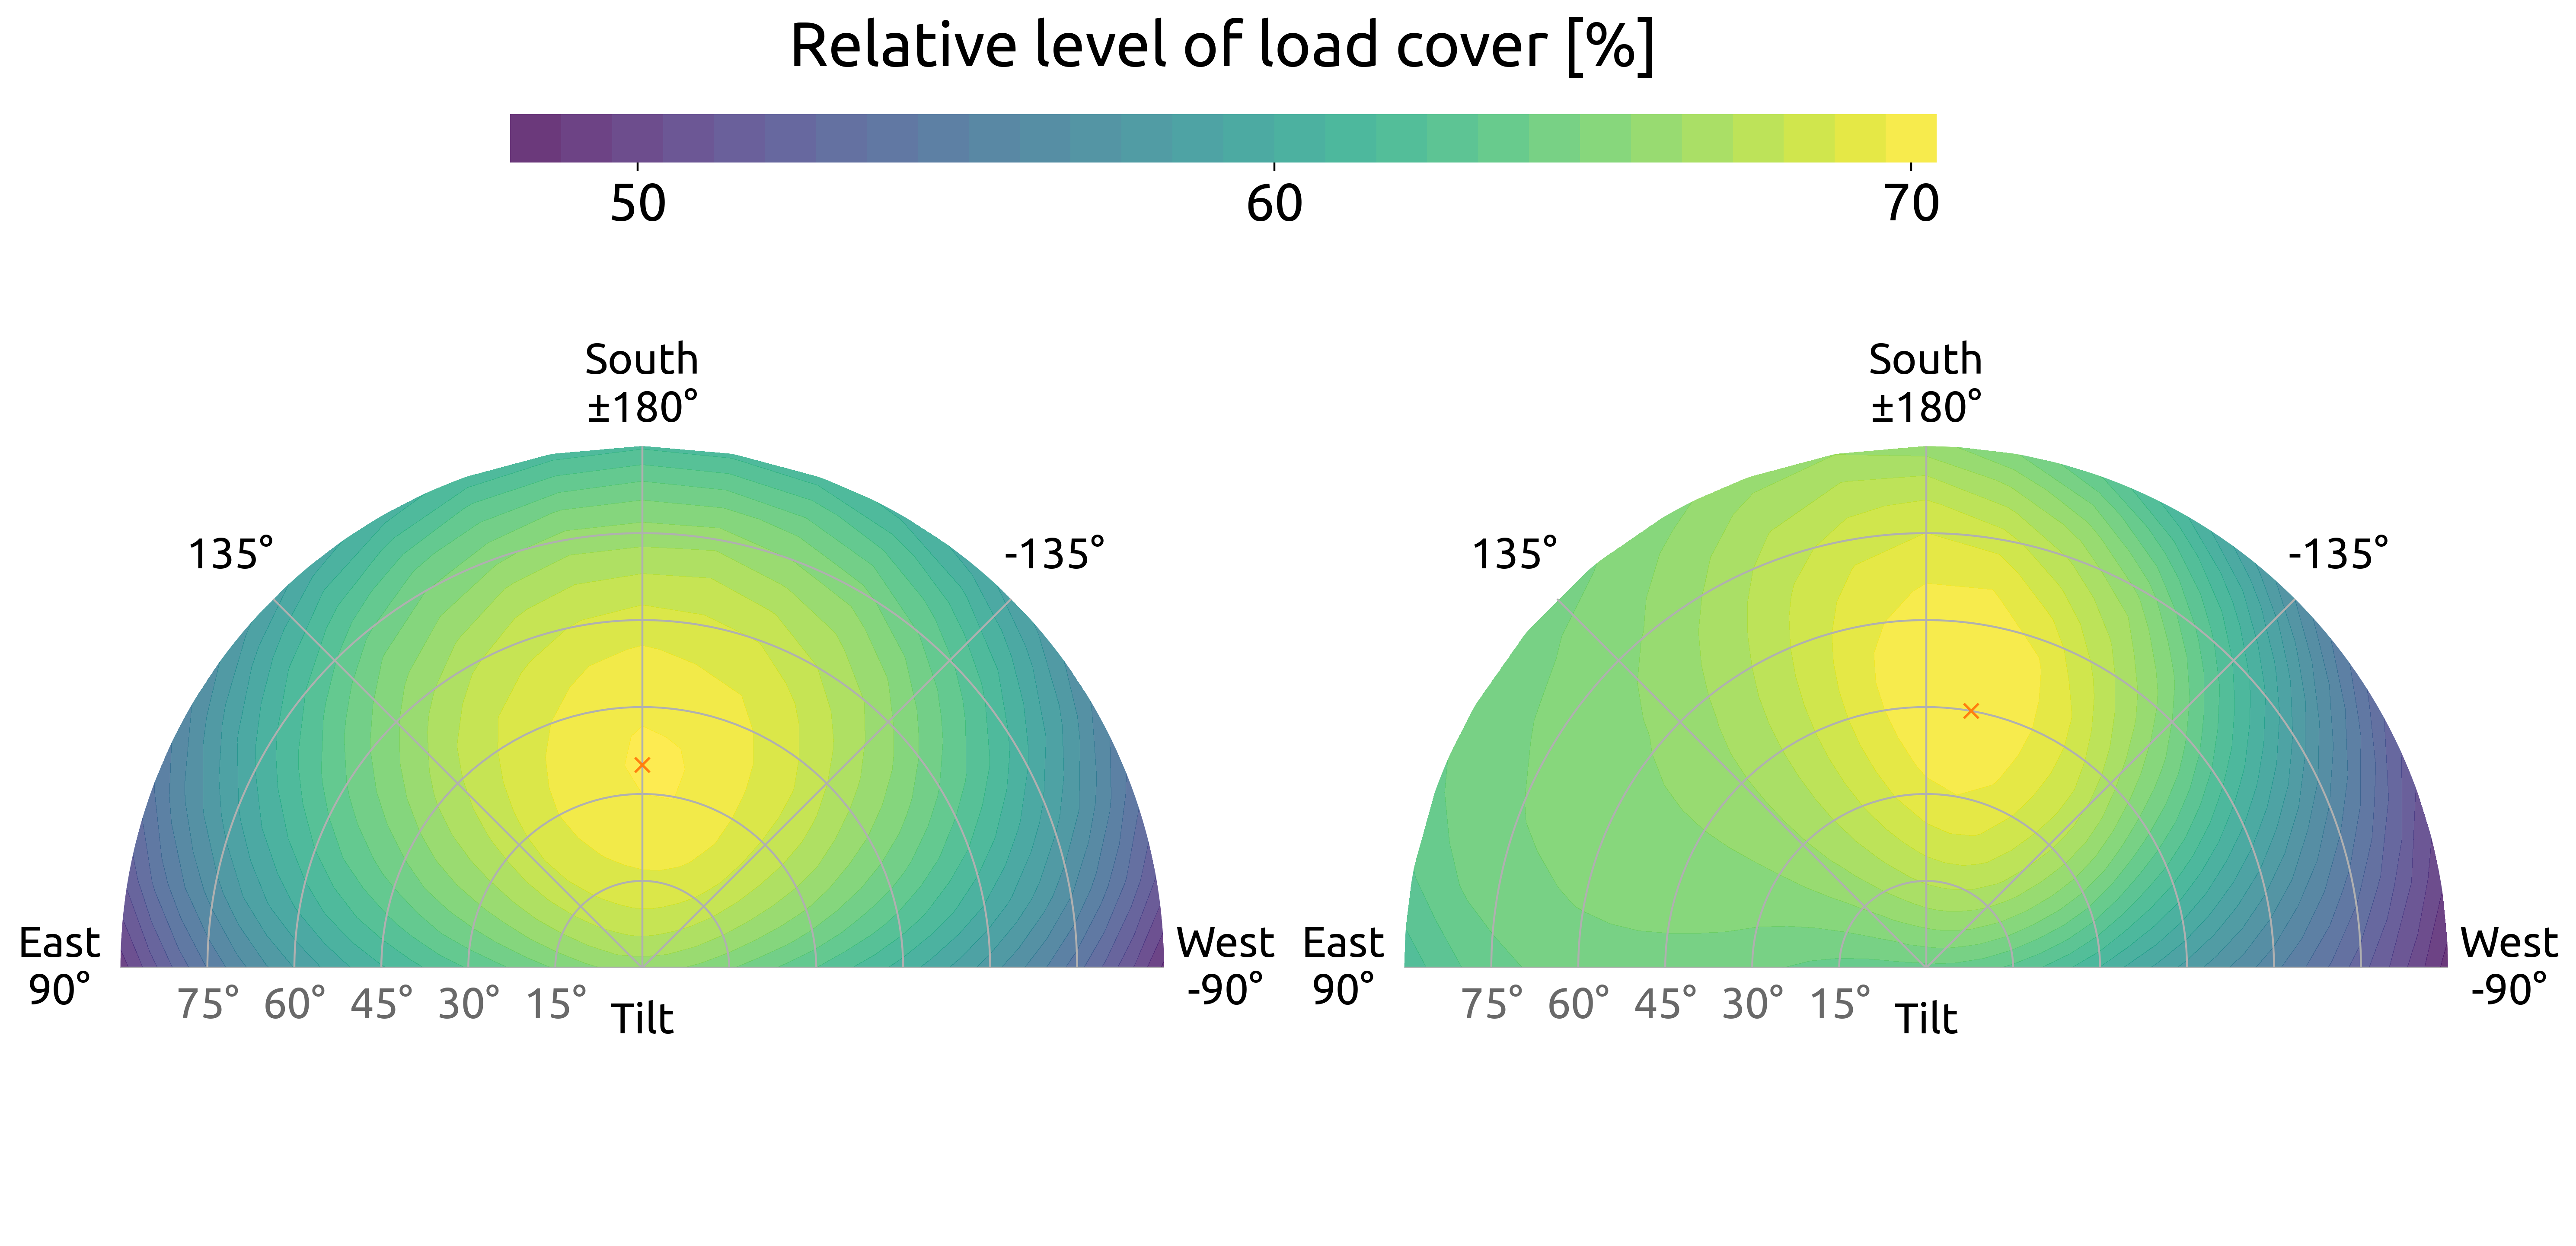

In [115]:
##2013/1992/2000 EU load cover  : Supp figure
plt.rcParams['figure.dpi'] = 400

fig, axs = plt.subplots(1,2, figsize=(15,7),subplot_kw={'projection': 'polar'}) #, sharey=True)  
plt.subplots_adjust(wspace=0.8, hspace=0.4)
j=1

for k, element in enumerate(['EU_load_cover', 'EU_peak_cover']):
  tilt_range = np.arange(start=0, stop=91, step=5)
  orientation_range = np.arange(start=90, stop=271, step=10)
  
  r_angles, theta_angles = np.meshgrid(tilt_range, np.radians(orientation_range))

  poa_tmy = np.zeros(shape=r_angles.shape)
  for o, orientation in enumerate(orientation_range):
    for t, tilt in enumerate(tilt_range):
        poa_tmy[o, t] = pv_config_fig_load.loc[tilt,orientation][element]


  ax_polar = axs[k]
  im = ax_polar.contourf(theta_angles, r_angles, poa_tmy * 100, 
                         levels=30, 
                         cmap='viridis', 
                         alpha=0.8,
                         vmax=pv_config_fig_load[element].max()*100)
  ax_polar.set_theta_zero_location('S')

  ax_polar.set_theta_zero_location('S')
  ax_polar.set_theta_direction(-1)
  ax_polar.set_thetamin(90)
  ax_polar.set_thetamax(270)


  # radius
  rtick_locs = np.arange(start=15, stop=90, step=15)
  rtick_labels = [f'{r}°' for r in rtick_locs]
  ax_polar.set_rgrids(rtick_locs, labels=rtick_labels, fontsize=12, color='dimgrey',  angle=0.)

  # orientation
  thetatick_locs = np.arange(start=90, stop=271, step=45)
  thetatick_labels = [] #['East','South east','South','South west','West']
  for theta in thetatick_locs:
    if theta == 180:
        thetatick_labels.append('South\n±180°')
    elif theta == 90:
        thetatick_labels.append('East\n90°')
    elif theta == 270:
        thetatick_labels.append('West\n-90°')    
    elif theta > 180:
        thetatick_labels.append(f'{theta - 360}°')
    else:
        thetatick_labels.append(f'{theta}°')


  ax_polar.set_thetagrids(thetatick_locs, labels=thetatick_labels, fontsize=18)
  ax_polar.xaxis.set_tick_params(pad=15)
  #if k==0: ax_polar.set_xlabel('EU solar load cover-2013'+'\nOrientation [°]\n', fontsize=12, )
  #if k==1: ax_polar.set_xlabel('EU solar peak load cover-2013'+'\nOrientation [°]\n', fontsize=12, )
  ax_polar.xaxis.set_label_coords(0, 0.93)

  # tilt
  ax_polar.set_ylabel('Tilt', rotation=0, fontsize=18)
  ax_polar.yaxis.set_label_coords(0.5, 0.18)
  ax_polar.set_rmax(90)
  ax_polar.set_rlabel_position(200)
  ax_polar.yaxis.set_tick_params(labelsize=18, labelcolor='dimgrey')

  # add cubes

  idx_max = np.unravel_index(np.argmax(poa_tmy, axis=None), poa_tmy.shape)
  ax_polar.plot(np.radians(orientation_range[idx_max[0]]), tilt_range[idx_max[1]], marker='x', color='C1')
  #spec_cube = fig.add_gridspec(nrows=1, ncols=1, left=0.7)
  #ax_cube = fig.add_subplot(spec_cube[0,0])
  #ax_cube.imshow(plt.imread('data/Figure2.16 - annual_irradiation - cube_main.png'))
  #ax_cube.axis('off')
  #plt.savefig('Figure2.16 - annual_irradiation.jpg', dpi=300, bbox_inches='tight')


# [left, bottom, width, height]
cbar_ax = fig.add_axes([0.2, 0.95, 0.55, 0.04])
spec_cbar = fig.add_gridspec(nrows=1, ncols=1, left=0.55, right=0.57)
cb=fig.colorbar(im, cax=cbar_ax, 
                ticks=np.arange(start=40, stop=71, step=10),
                shrink=0.01, orientation="horizontal",)

cb.ax.set_title('Relative level of load cover [%]', fontsize=26, pad=20)
cb.ax.tick_params(labelsize=22)
cbar_ax.yaxis.set_major_formatter(PercentFormatter())

fig.tight_layout()
plt.show()

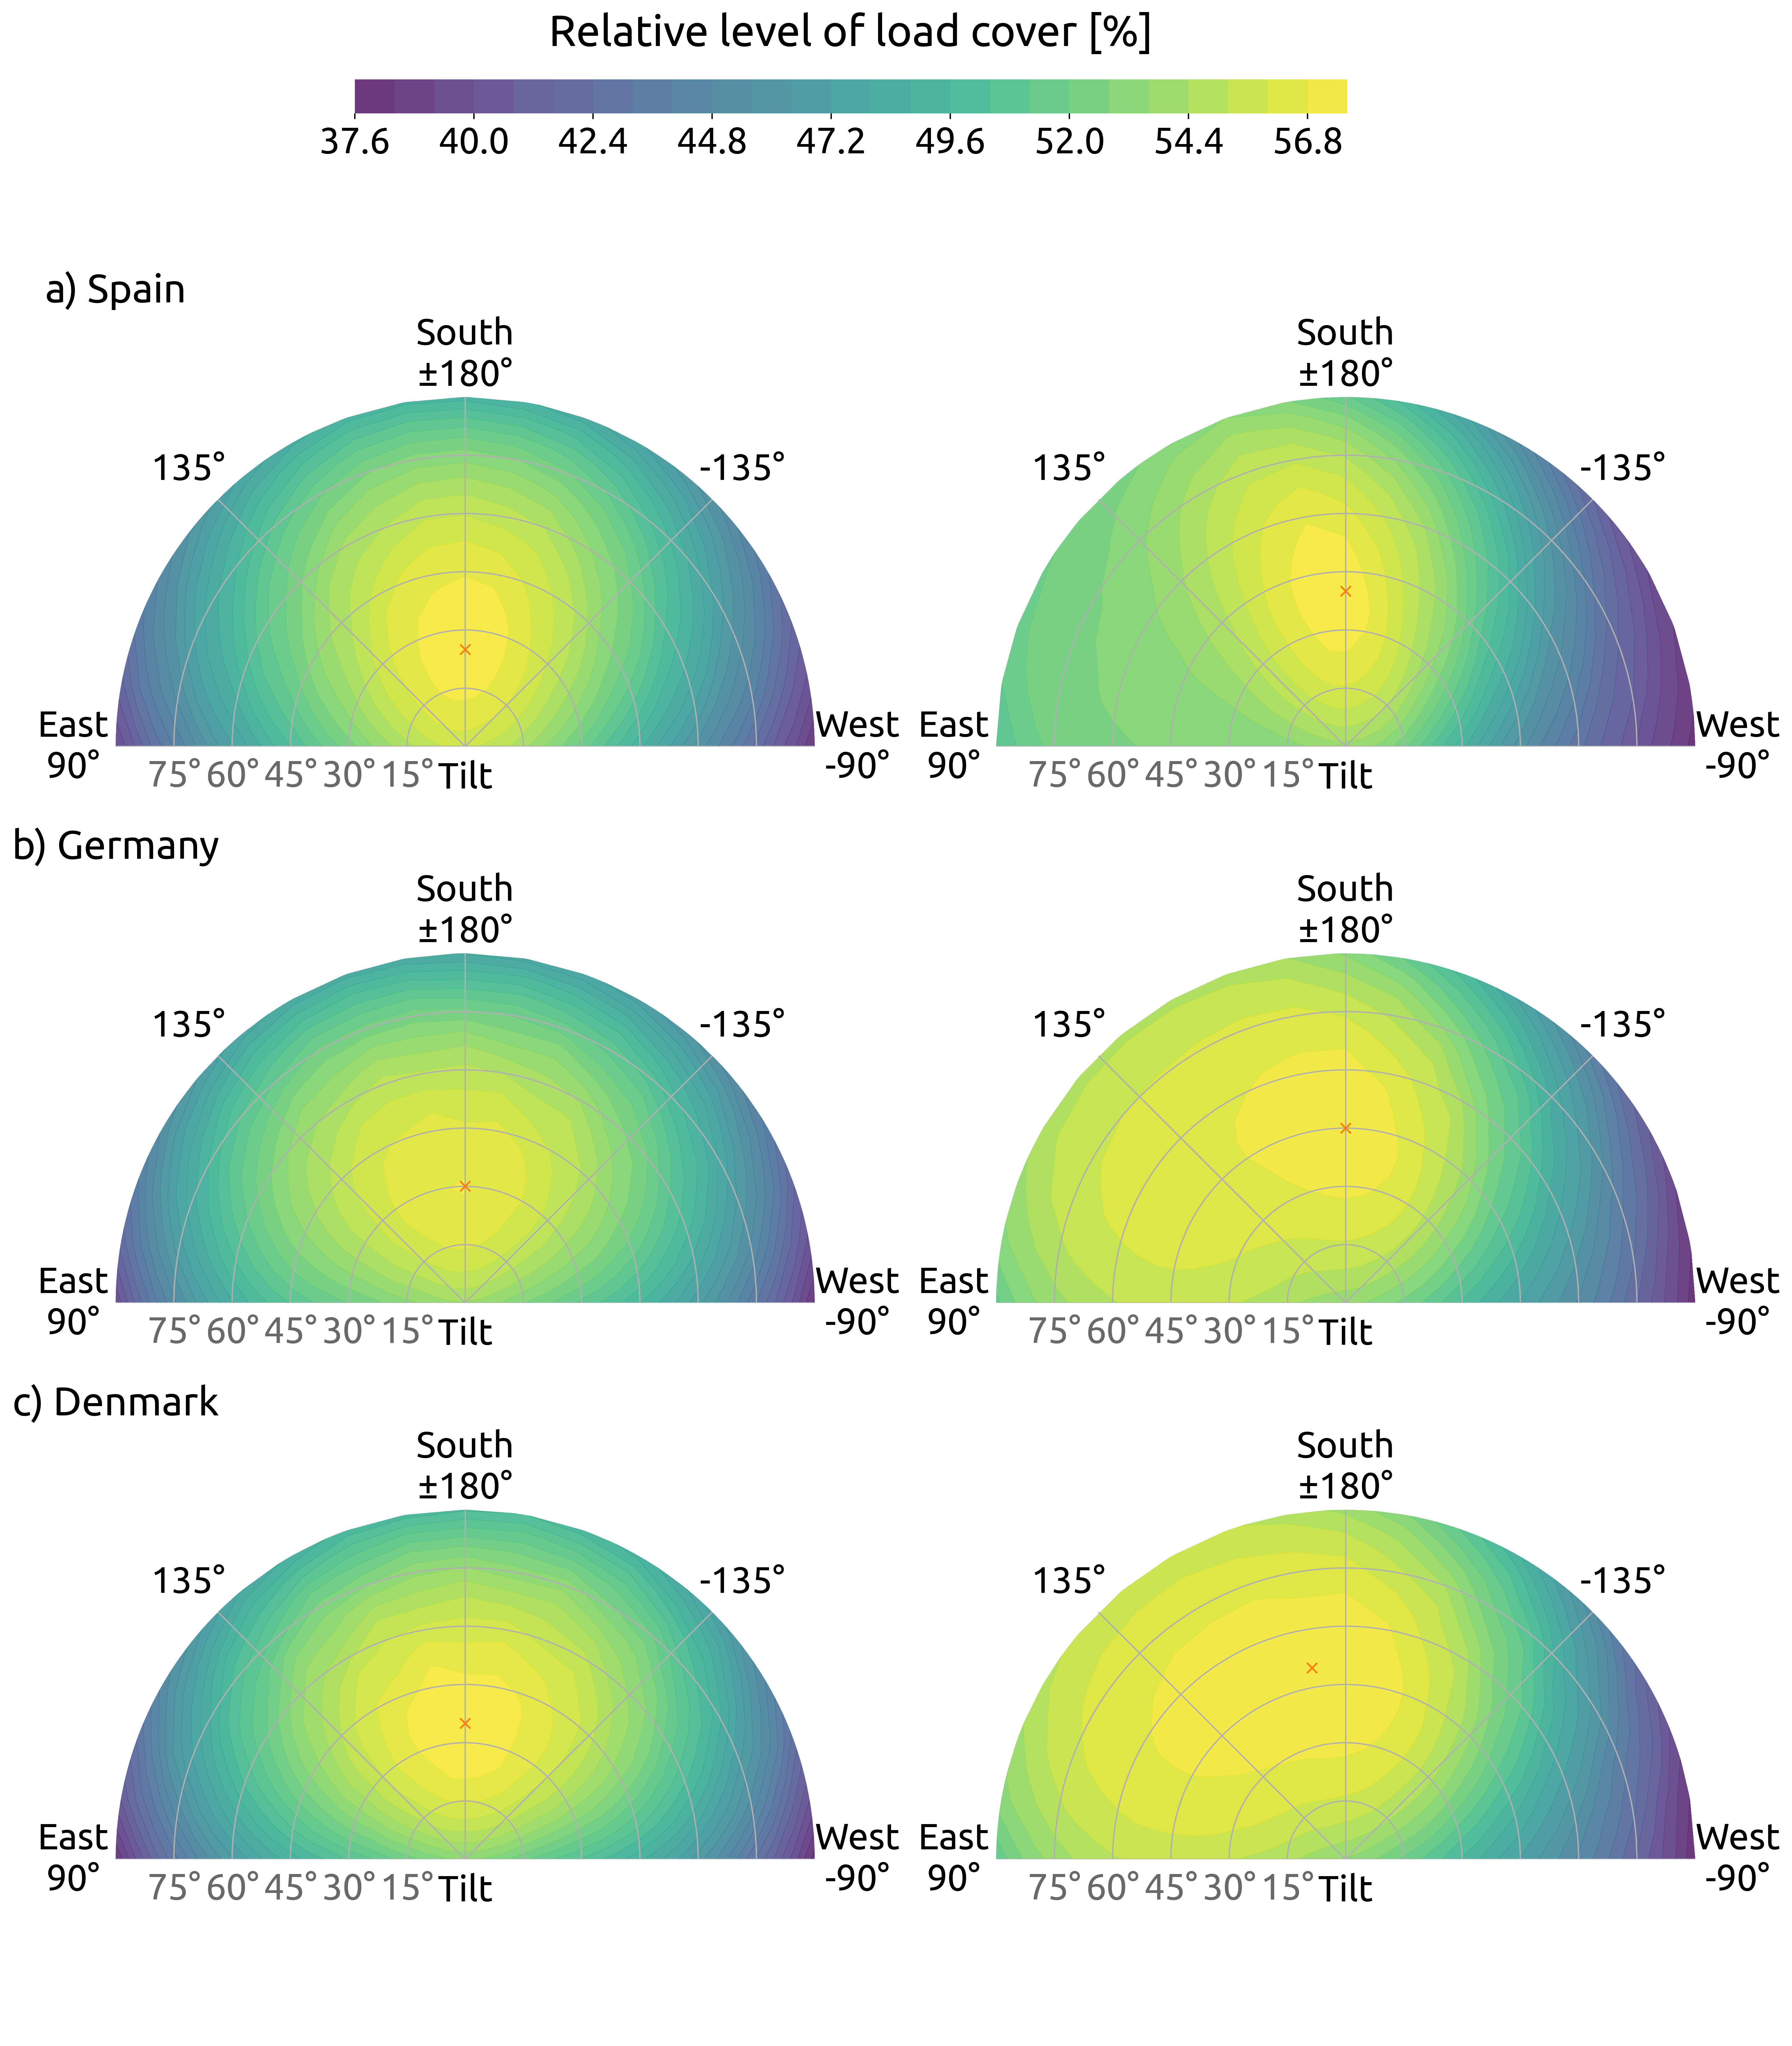

In [116]:
## 1992/2000/2013 countries : load cover and peak load cover
## figure 2

plt.rcParams['figure.dpi'] = 400
plt.rc('font',family='Ubuntu')


fig, axs = plt.subplots(3,2, figsize=(15, 18.75),subplot_kw={'projection': 'polar'}) #, sharey=True)  #15, 18.75
plt.subplots_adjust(wspace=0.08, hspace=-0.8)
j=1

label_letter=['a) ','b) ','c) ']

for k, country in enumerate(['ES', 'DE', 'DK']):  #'PT', 'FR' , 'GB'
 #print(country)   
 load= n.loads_t.p_set.filter(like=country).sum(axis=1)
 CAP_base = (load.mean()/
             pv_config.sel(bus=country).sel(slope=35).sel(
                 azimuth=180).to_dataframe().__xarray_dataarray_variable__.mean())   
 for i ,element in enumerate (['load cover', 'load peak cover']): 
  
  tilt_range = np.arange(start=0, stop=91, step=5)
  orientation_range = np.arange(start=90, stop=271, step=10)
  r_angles, theta_angles = np.meshgrid(tilt_range, np.radians(orientation_range))

  poa_tmy = np.zeros(shape=r_angles.shape)
  for o, orientation in enumerate(orientation_range):
    for t, tilt in enumerate(tilt_range):
         temp=pv_config.sel(bus=country).sel(slope=tilt).sel(azimuth=orientation).to_dataframe()
         temp.__xarray_dataarray_variable__ *= CAP_base
         if element=='load cover':
            poa_tmy[o, t] = (1-
                            ((load-temp.__xarray_dataarray_variable__).clip(0).sum()/load.sum()))
            cmap_= 'viridis'
         elif element == 'load peak cover':
            poa_tmy[o, t] = (1-
              ((load.loc[peak_hours]-temp.loc[peak_hours].__xarray_dataarray_variable__).clip(0).sum()/
               load.loc[peak_hours].sum()))
            cmap_= 'viridis' #'cividis'

  ax_polar = axs[k,i]

  im = ax_polar.contourf(theta_angles, r_angles, poa_tmy * 100, levels=30, cmap=cmap_, alpha=0.8)
  ax_polar.set_theta_zero_location('S')

  ax_polar.set_theta_zero_location('S')
  ax_polar.set_theta_direction(-1)
  ax_polar.set_thetamin(90)
  ax_polar.set_thetamax(270)


  # radius
  rtick_locs = np.arange(start=15, stop=90, step=15)
  rtick_labels = [f'{r}°' for r in rtick_locs]
  ax_polar.set_rgrids(rtick_locs, labels=rtick_labels, fontsize=20, color='dimgrey',  angle=0.)
  #ax_polar.set_yticklabels([])
  #for loc, lbl in zip(rtick_locs, rtick_labels):
  #  ax.text(0., loc, lbl,
  #          ha='center',
  #          va='top', 
  #          fontsize=16)
    
  # orientation
  thetatick_locs = np.arange(start=90, stop=271, step=45)
  thetatick_labels = [] #['East','South east','South','South west','West']
  for theta in thetatick_locs:
    if theta == 180:
        thetatick_labels.append('South\n±180°')
    elif theta == 90:
        thetatick_labels.append('East\n90°')
    elif theta == 270:
        thetatick_labels.append('West\n-90°')    
    elif theta > 180:
        thetatick_labels.append(f'{theta - 360}°')
    else:
        thetatick_labels.append(f'{theta}°')

  ax_polar.set_thetagrids(thetatick_locs, labels=thetatick_labels, fontsize=22)
  ax_polar.xaxis.set_tick_params(pad=15)
  if i==0: ax_polar.set_xlabel(label_letter[k]+country_codes[country], fontsize=24, )  #+'\nOrientation [°]'
  ax_polar.xaxis.set_label_coords(0, 0.93)

  # tilt
  ax_polar.set_ylabel('Tilt', rotation=0, fontsize=22)
  ax_polar.yaxis.set_label_coords(0.5, 0.18)
  ax_polar.set_rmax(90)
  ax_polar.set_rlabel_position(200)
  ax_polar.yaxis.set_tick_params(labelsize=22, labelcolor='dimgrey')

  # add cubes

  idx_max = np.unravel_index(np.argmax(poa_tmy, axis=None), poa_tmy.shape)
  ax_polar.plot(np.radians(orientation_range[idx_max[0]]), tilt_range[idx_max[1]], marker='x', color='C1')

  #spec_cube = fig.add_gridspec(nrows=1, ncols=1, left=0.7)
  #ax_cube = fig.add_subplot(spec_cube[0,0])
  #ax_cube.imshow(plt.imread('data/Figure2.16 - annual_irradiation - cube_main.png'))
  #ax_cube.axis('off')
  #plt.savefig('Figure2.16 - annual_irradiation.jpg', dpi=300, bbox_inches='tight')


# [left, bottom, width, height]
cbar_ax = fig.add_axes([0.2, 0.95, 0.55, 0.015])
spec_cbar = fig.add_gridspec(nrows=1, ncols=1, left=0.55, right=0.57)
cb=fig.colorbar(im, cax=cbar_ax, 
                #ticks=np.arange(start=0, stop=101, step=10),
                shrink=0.01, orientation="horizontal",)

cb.ax.set_title('Relative level of load cover [%]', fontsize=26, pad=20)
cb.ax.tick_params(labelsize=22)
cbar_ax.yaxis.set_major_formatter(PercentFormatter())

fig.tight_layout()
plt.show()

## figure 7

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import geopandas as gpd
import pandas as pd
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

import cartopy.crs as ccrs
from cartopy.crs import PlateCarree as plate
import cartopy.io.shapereader as shpreader

import xarray as xr
import atlite

import logging
import warnings

In [2]:
nodes_37 = gpd.read_file('resources/regions_onshore_elec_s370.geojson').set_index("name")
Europe_=nodes_37.squeeze()


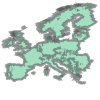

In [3]:
Europe_.unary_union

In [ ]:
## build sample cutout for europe
cutout = atlite.Cutout(
    path="test.nc", 
    module="era5", 
    bounds=Europe_.unary_union.bounds, time="2011-01-01"
)

# This is where all the work happens (this can take some time, for us it took ~15 minutes).
cutout.prepare()

In [16]:
projection = ccrs.Orthographic(0, 35)

cells = cutout.grid
df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
country_bound = gpd.GeoSeries(cells.unary_union)


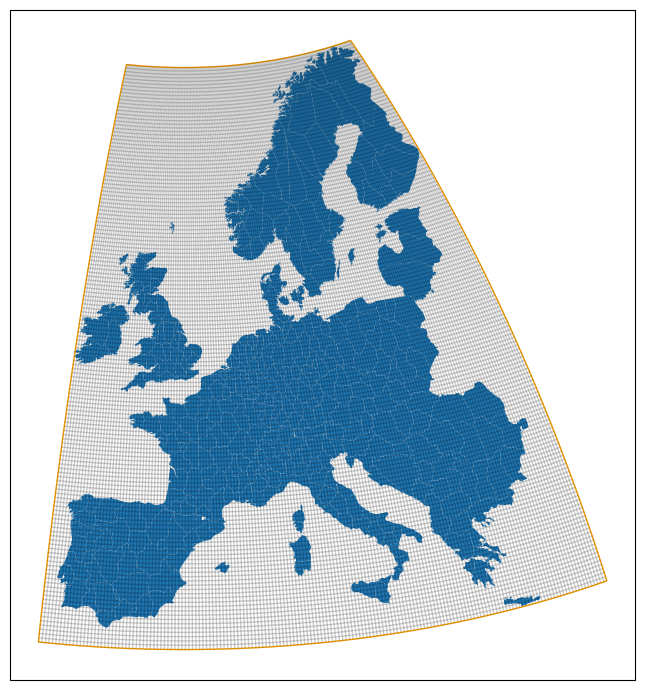

In [17]:
fig = plt.figure(figsize=(12, 7))
gs = GridSpec(3, 3, figure=fig)

ax = fig.add_subplot(gs[:, 0:2], projection=projection)
plot_grid_dict = dict(
    alpha=0.1,
    edgecolor="k",
    zorder=4,
    aspect="equal",
    facecolor="None",
    transform=plate(),
)
Europe_.plot(ax=ax, zorder=1, transform=plate())
cells.plot(ax=ax, **plot_grid_dict)
country_bound.plot(ax=ax, edgecolor="orange", facecolor="None", transform=plate())
#ax.outline_patch.set_edgecolor("white")
"""
ax1 = fig.add_subplot(gs[0, 2])
cutout.data.wnd100m.mean(["x", "y"]).plot(ax=ax1)
ax1.set_frame_on(False)
ax1.xaxis.set_visible(False)

ax2 = fig.add_subplot(gs[1, 2], sharex=ax1)
cutout.data.influx_direct.mean(["x", "y"]).plot(ax=ax2)
ax2.set_frame_on(False)
ax2.xaxis.set_visible(False)

ax3 = fig.add_subplot(gs[2, 2], sharex=ax1)
cutout.data.runoff.mean(["x", "y"]).plot(ax=ax3)
ax3.set_frame_on(False)
ax3.set_xlabel(None)
"""

fig.tight_layout()

In [ ]:
import pypsa
n=pypsa.Network('overnight_runs/prenetworks/elec_s370_37m_lv1.1__Co2L0p05-1H-T-H-I-solar+p2-dist1-highrooftop3-newsolar-allin_2050.nc')

Text(0.5, 1.0, 'Node in Germany')

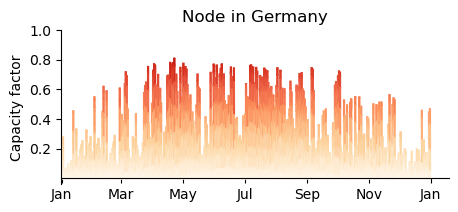

In [20]:
import datetime
from matplotlib.dates import DateFormatter
from matplotlib import cm
import matplotlib
import numpy as np

fig, axs = plt.subplots(figsize=(5,2)) #, sharey=True)
date_form = DateFormatter("%b")
j=0
cmap = plt.get_cmap('OrRd') 
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
df=n.generators_t.p_max_pu.loc[:, 'DE1 7 solar rooftop']

for i in np.arange(0,8759):
   axs.plot(df[i:i+2], 
         color=cmap(norm(df[i])))
   #print(df[i:i+2])
   
        
    
xmin, xmax = axs.get_xlim()
#axs.spines['left'].set_position(('data', xmin+18 ))
axs.spines['bottom'].set_position(('data', 0))
axs.set_xlim(xmin+18 , xmax)

axs.set_yticks(np.arange(0.2, 1.1, 0.2),fontsize=25)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

axs.xaxis.set_major_formatter(date_form)
axs.set_ylabel('Capacity factor')
axs.set_title('Node in Germany')





<GeoAxesSubplot:>

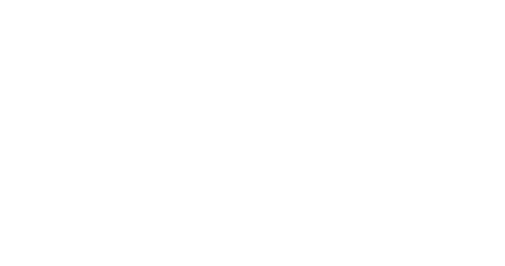

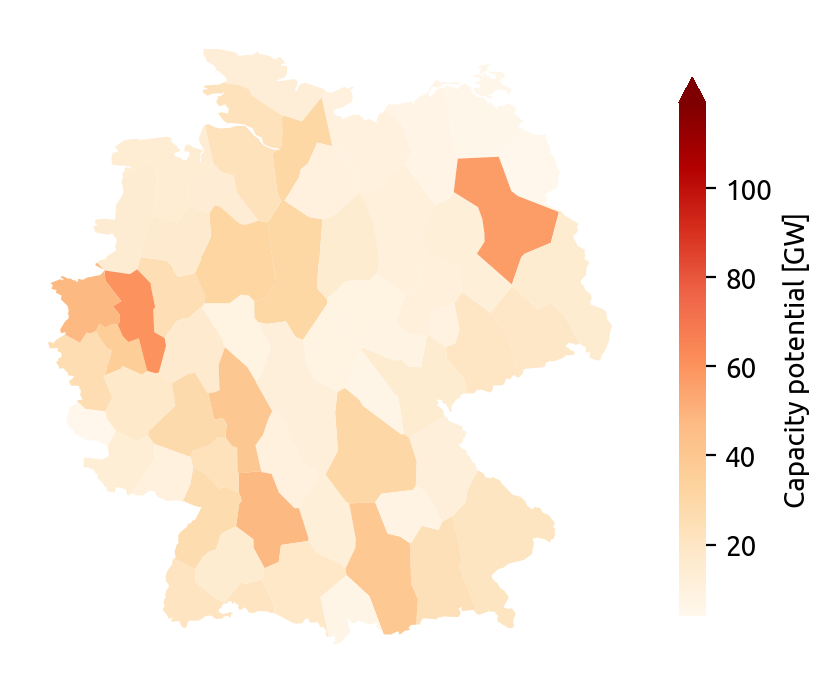

In [50]:
import cartopy.crs as ccrs
import cartopy
import geopandas as gpd


proj = ccrs.EqualEarth()

fig, ax = plt.subplots(figsize=(3,3), subplot_kw={"projection": proj})
plt.rcParams['figure.dpi'] = 200
plt.rc('font',family='Ubuntu')
plt.rc('axes',edgecolor='None')

location = (
        pd.Series([' '.join(i.split(' ')[:2]) for i in n.generators.index], index=n.generators.index)
        )


geodf = gpd.read_file('resources/regions_onshore_elec_s370.geojson').set_index("name")
geodf = geodf.to_crs(proj.proj4_init)

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={"projection": proj})

s=(n.generators.p_nom_max.groupby([ n.generators.carrier , n.generators.index.map(location)])
   .sum()['solar rooftop'])

to_drop = [i for i in geodf.index if i not in s.index]
geodf=geodf.drop(labels=to_drop)
s= pd.Series(s.values, geodf.index)

country='DE'

geodf_= geodf.loc[[i for i in geodf.index if country in i]]


geodf_.plot(
        ax=ax,
        column=s[[i for i in s.index if country in i]]/1e3,   #MW to GW
        # transform=ccrs.PlateCarree(),
        cmap="OrRd",
        alpha=1,
        linewidths=0,
        vmax=s.max()/1e3,
        legend=True,
        legend_kwds={"label": 'Capacity potential [GW]', "shrink": 0.7, "extend": "max"},  #Solar rooftop max capacity
        
    )

#ax.add_feature(cartopy.feature.COASTLINE.with_scale("50m"), linewidth=0.2, zorder=2)
#ax.add_feature(cartopy.feature.BORDERS.with_scale("50m"), linewidth=0.2, zorder=2)
